<a href="https://colab.research.google.com/github/apervmm/Block-Cipher/blob/main/AES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycryptodome

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 12.0 MB/s eta 0:00:00


# TASK 1: Modes of Operation

In [ ]:
from Crypto.Random import get_random_bytes
from Crypto.Util.Padding import pad, unpad
from Crypto.Cipher import AES

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [ ]:
def encrypt_ecb(plain, key):
    cipher = AES.new(key, AES.MODE_ECB)

    # print("plain: ", plain)


    padded = pad(plain, 16, style='pkcs7')
    # print("padded: ", padded)


    blocks = []
    for i in range(0, len(padded), 16):
        blocks.append(padded[i: i+16])
    # print("blocks :", blocks)

    encrypted = []
    for block in blocks:
        encrypted.append(cipher.encrypt(block))
    # print("encryp: ", encrypted)

    encrypted_bytes = b''.join(encrypted)
    # print("bytes: ", encrypted_bytes)

    return encrypted_bytes


def decrypt_ecb(encrypted_data, key):
    cipher = AES.new(key, AES.MODE_ECB)

    blocks = []
    for i in range(0, len(encrypted_data), 16):
        blocks.append(cipher.decrypt(encrypted_data[i: i+16]))


    decrypted = b''.join(blocks)

    dec = unpad(decrypted, 16, style='pkcs7')
    # print("Decrypted data:", decrypted)
    return dec

In [ ]:
def encrypt_cbc(plain, key, iv):
    cipher = AES.new(key, AES.MODE_ECB)
    # print(plain)
    padded = pad(plain, 16, style='pkcs7')
    # print("padded: ", padded)

    blocks = []
    for i in range(0, len(padded), 16):
        blocks.append(padded[i: i+16])
    # print(blocks)

    prev_block = iv
    cipher_blocks = []
    for block in blocks:
        xored = bytes(a ^ b for a, b in zip(block, prev_block))

        enc = cipher.encrypt(xored)
        cipher_blocks.append(enc)
        prev_block = enc

    # print(cipher_blocks)

    encrypted = iv + b''.join(cipher_blocks)

    return encrypted


def decrypt_cbc(encrypted, key):
    iv = encrypted[:16]
    ciphertxt = encrypted[16:]

    cipher = AES.new(key, AES.MODE_ECB)

    prev = iv
    blocks = []

    for i in range(0, len(ciphertxt), 16):
        cur = ciphertxt[i: i+16]
        dec_block = cipher.decrypt(cur)
        xored = bytes(a ^ b for a, b in zip(dec_block, prev))
        blocks.append(xored)
        prev = cur

    concated = b''.join(blocks)
    # print(concated)

    plain = unpad(concated, 16, style='pkcs7')
    return plain

In [ ]:
def display_images(original, ecb_encrypted, cbc_encrypted):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    axs[0].imshow(np.array(Image.open(original)))
    axs[0].set_title('Original')

    axs[1].imshow(np.array(Image.open(ecb_encrypted)))
    axs[1].set_title('ECB Encrypted')

    axs[2].imshow(np.array(Image.open(cbc_encrypted)))
    axs[2].set_title('CBC Encrypted')

    plt.show()


In [ ]:
def process(im):
    with open(im, 'rb') as f: # read only 54bits
        header = f.read(54)

    key = get_random_bytes(16)
    # print(key)
    iv = get_random_bytes(16)

    with open(im, 'rb') as f:
        f.seek(54)
        data = f.read()

    ecb_encrypted = encrypt_ecb(data, key)
    cbc_encrypted = encrypt_cbc(data, key, iv)
    # print("cbc_enc :", cbc_encrypted)



    with open(im[:-4] + 'ecb_encrypted.bmp', 'wb') as f:
        f.write(header + ecb_encrypted)

    with open(im[:-4] + 'cbc_encrypted.bmp', 'wb') as f:
        f.write(header + iv + cbc_encrypted)


    ecb_decrypted = decrypt_ecb(ecb_encrypted, key)
    cbc_decrypted= decrypt_cbc(cbc_encrypted, key)
    # print(cbc_decrypted)

    # if data != cbc_decrypted:
    #     print("DIFF")
    # else:
    #     print("SIML")


    with open(im[:-4] + 'ecb_decrypted.bmp', 'wb') as f:
        f.write(header + ecb_decrypted)
    with open(im[:-4] + 'cbc_decrypted.bmp', 'wb') as f:
        f.write(header + cbc_decrypted)


    display_images(im, 'ecb_encrypted.bmp', 'cbc_encrypted.bmp')


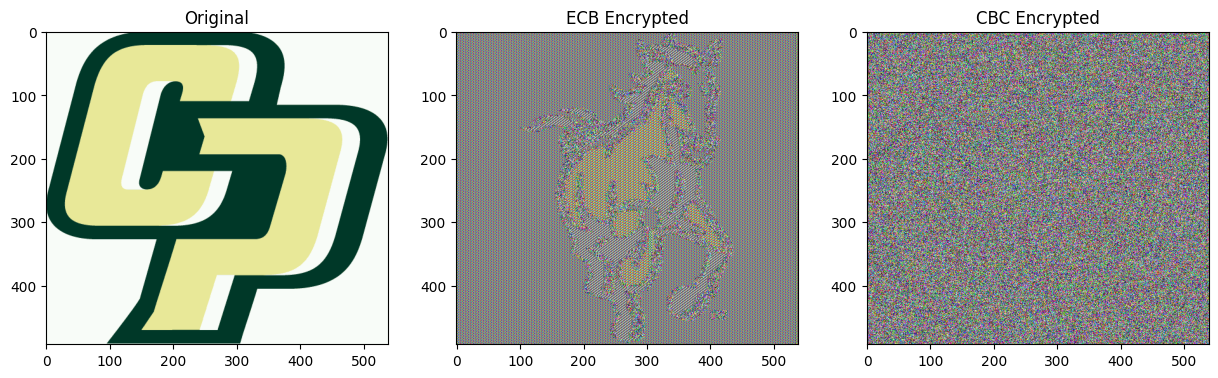

In [ ]:
process("cp-logo.bmp")

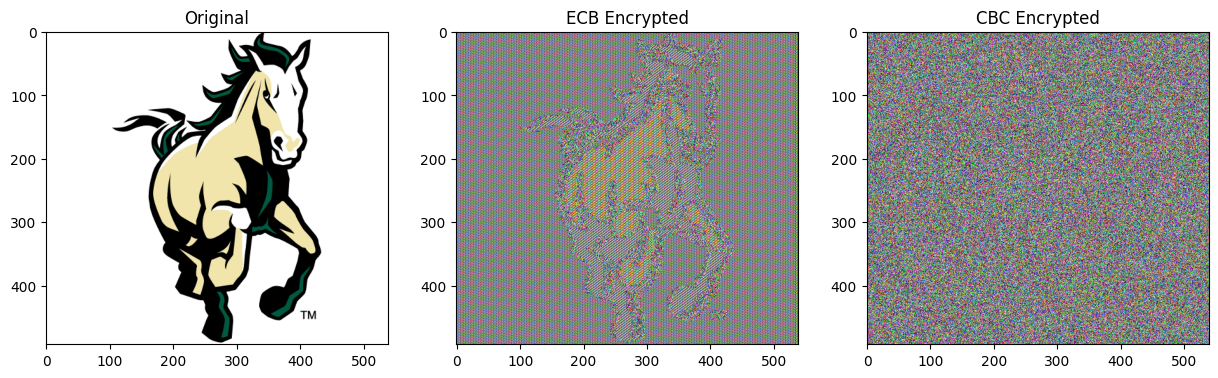

In [ ]:
process("mustang.bmp")

# TASK 2:  Limits of confidentiality

In [ ]:
key = get_random_bytes(16)
iv = get_random_bytes(16)

In [ ]:
def url_encode(input):
    map = {
        ';': '%3B',
        '=': '%3D',
    }
    encoded_str = ''
    for char in input:
        if char in map:
            encoded_str += map[char]
        else:
            encoded_str += char
    return encoded_str


def url_decode(input):
    map = {
        '%3B': ';',
        '%3D':'='
    }
    decoded = ''
    for char in input:
        if char in map:
            decoded += map[char]
        else:
            decoded += char
    return decoded

In [ ]:
def submit(s, key, iv):
    prepend = "userid=456;userdata="
    append = ";session-id=31337"
    encoded = url_encode(s)
    #print("encoded_url :", s)
    new_str = (prepend + encoded + append).encode('utf-8')
    #print("utf8 :", new_str)
    #padded = pad(new_str, 16, style = "pkcs7")
    cptxt = encrypt_cbc(new_str, key, iv)#AES.new(key, AES.MODE_CBC, iv)
    #cptxt = cipher.encrypt(padded)
    return cptxt


# def submit(s, key, iv):
#     prepend = "userid=456;userdata="
#     append = ";session-id=31337"
#     new_str = (prepend + s + append).encode('utf-8')
#     padded = pad(new_str, 16, style = "pkcs7")
#     cipher = encrypt_cbc(new_str, key, iv)#AES.new(key, AES.MODE_CBC, iv)
#     cptxt = cipher.encrypt(padded)
#     return cptxt

print(submit("@admin$true", key, iv))


b'\xad9\xff&\xd7_?\x16sx\xb77\xf5\xd9hW6\xc2\xf8\x98j\xb6\x18\x97\xaf\x06:"\x19\x84]V\xcd\x014\xe9\xb8\xa0l\xa6\x95^\xb3T\x9c\xc5\x0f3\x80\x91\xa0\xcb\xd63\xef\xd5\t\xbe;\xaa\xea\xca\x94E[.\xa0?\xed\\\x82\x9e~\xf1\xf7\xf8(\xdf2\xd9'


In [ ]:
def verify(ciphertext, key):
   #print("Verify cipher: ", ciphertext)
    decrypted  = decrypt_cbc(ciphertext, key)
    #print("cbc decrypted: ", decrypted)
    decoded = url_decode(decrypted.decode('utf-8'))
    #print("url_decoded: ", decoded)
    if ";admin=true;" in decoded:
        return True
    else:
        return False

cipher = submit("@admin$true*", key, iv)
print(verify(cipher, key))

False


Tampering Injection / Bit Flipping Attck

In [ ]:
def inject(ciphertext):
    enc_list = bytearray(ciphertext[16:])
    #print("BYTEARR: ", enc_list)
    enc_list[4] ^= (ord("@") ^ ord(";"))
    enc_list[10] ^= (ord("$") ^ ord("="))
    enc_list[15] ^= (ord("*") ^ ord(";"))
    return bytes(enc_list)


cipher = submit("@admin$true*", key, iv)
print(verify(inject(cipher), key))

True


# Task 3: Performance comparison

```
openssl speed aes
```

```
Doing aes-128-cbc for 3s on 16 size blocks: 71161075 aes-128-cbc's in 3.00s
Doing aes-128-cbc for 3s on 64 size blocks: 26897677 aes-128-cbc's in 3.00s
Doing aes-128-cbc for 3s on 256 size blocks: 11994440 aes-128-cbc's in 3.00s
Doing aes-128-cbc for 3s on 1024 size blocks: 3086207 aes-128-cbc's in 3.00s
Doing aes-128-cbc for 3s on 8192 size blocks: 386261 aes-128-cbc's in 3.00s
Doing aes-128-cbc for 3s on 16384 size blocks: 196556 aes-128-cbc's in 3.00s
Doing aes-192-cbc for 3s on 16 size blocks: 138739946 aes-192-cbc's in 3.00s
Doing aes-192-cbc for 3s on 64 size blocks: 35527667 aes-192-cbc's in 3.00s
Doing aes-192-cbc for 3s on 256 size blocks: 9872003 aes-192-cbc's in 3.00s
Doing aes-192-cbc for 3s on 1024 size blocks: 2486662 aes-192-cbc's in 3.00s
Doing aes-192-cbc for 3s on 8192 size blocks: 335470 aes-192-cbc's in 3.00s
Doing aes-192-cbc for 3s on 16384 size blocks: 166900 aes-192-cbc's in 3.00s
Doing aes-256-cbc for 3s on 16 size blocks: 123530032 aes-256-cbc's in 3.00s
Doing aes-256-cbc for 3s on 64 size blocks: 35948070 aes-256-cbc's in 3.00s
Doing aes-256-cbc for 3s on 256 size blocks: 8703157 aes-256-cbc's in 3.00s
Doing aes-256-cbc for 3s on 1024 size blocks: 2204937 aes-256-cbc's in 3.00s
Doing aes-256-cbc for 3s on 8192 size blocks: 282282 aes-256-cbc's in 3.00s
Doing aes-256-cbc for 3s on 16384 size blocks: 146436 aes-256-cbc's in 3.00s

version: 3.0.2
built on: Tue Aug 20 17:27:32 2024 UTC
options: bn(64,64)
compiler: gcc -fPIC -pthread -m64 -Wa,--noexecstack -Wall -Wa,--noexecstack -g -O2 -ffile-prefix-map=/build/openssl-aGUoHt/openssl-3.0.2=. -flto=auto -ffat-lto-objects -flto=auto -ffat-lto-objects -fstack-protector-strong -Wformat -Werror=format-security -DOPENSSL_TLS_SECURITY_LEVEL=2 -DOPENSSL_USE_NODELETE -DL_ENDIAN -DOPENSSL_PIC -DOPENSSL_BUILDING_OPENSSL -DNDEBUG -Wdate-time -D_FORTIFY_SOURCE=2
CPUINFO: OPENSSL_ia32cap=0xfedab2035f8bffff:0x9c27a9
The 'numbers' are in 1000s of bytes per second processed.

type             16 bytes     64 bytes    256 bytes   1024 bytes   8192 bytes  16384 bytes
aes-128-cbc     379525.73k   573817.11k  1023525.55k  1053425.32k  1054750.04k  1073457.83k
aes-192-cbc     739946.38k   757923.56k   842410.92k   848780.63k   916056.75k   911496.53k
aes-256-cbc     658826.84k   766892.16k   742669.40k   752618.50k   770818.05k   799735.81k
```

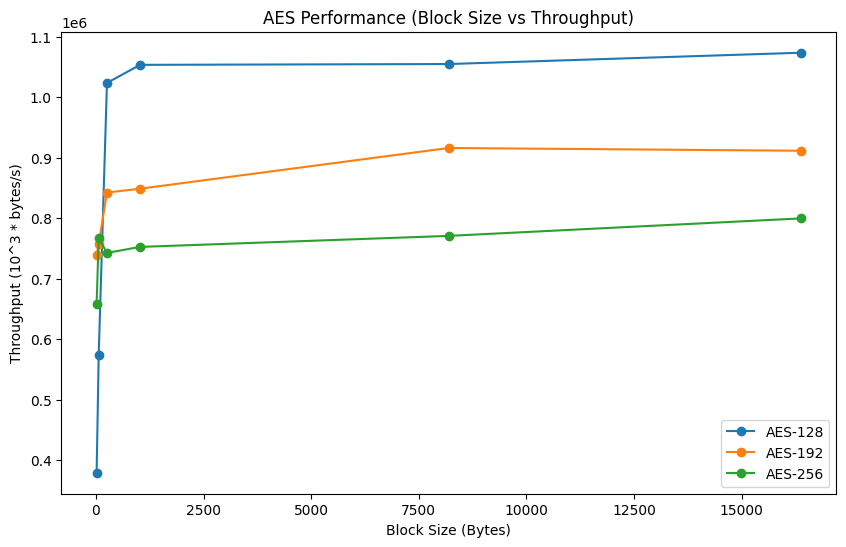

In [ ]:
import matplotlib.pyplot as plt

def plot_aes_results():
    block_sizes = [16, 64, 256, 1024, 8192, 16384]

    throughput_128 = [ 379525.73,  573817.11,  1023525.55,  1053425.32, 1054750.04,  1073457.83]
    throughput_192 = [739946.38,  757923.56,   842410.92, 848780.63,   916056.75,  911496.53]
    throughput_256 = [658826.84,  766892.16,   742669.40,   752618.50,  770818.05,   799735.81]

    plt.figure(figsize=(10, 6))

    plt.plot(block_sizes, throughput_128, label="AES-128", marker='o')
    plt.plot(block_sizes, throughput_192, label="AES-192", marker='o')
    plt.plot(block_sizes, throughput_256, label="AES-256", marker='o')

    plt.xlabel("Block Size (Bytes)")
    plt.ylabel("Throughput (10^3 * bytes/s)")
    plt.title("AES Performance (Block Size vs Throughput)")
    plt.legend()

    plt.savefig('aes_performance.png')
    plt.show()

plot_aes_results()


```
openssl speed rsa
```
```
Doing 512 bits private rsa's for 10s: 210508 512 bits private RSA's in 9.99s
Doing 512 bits public rsa's for 10s: 3865901 512 bits public RSA's in 10.00s
Doing 1024 bits private rsa's for 10s: 89489 1024 bits private RSA's in 10.00s
Doing 1024 bits public rsa's for 10s: 1031281 1024 bits public RSA's in 10.00s
Doing 2048 bits private rsa's for 10s: 13041 2048 bits private RSA's in 10.00s
Doing 2048 bits public rsa's for 10s: 479097 2048 bits public RSA's in 10.00s
Doing 3072 bits private rsa's for 10s: 3688 3072 bits private RSA's in 10.00s
Doing 3072 bits public rsa's for 10s: 222963 3072 bits public RSA's in 10.00s
Doing 4096 bits private rsa's for 10s: 1625 4096 bits private RSA's in 10.01s
Doing 4096 bits public rsa's for 10s: 137502 4096 bits public RSA's in 10.00s
Doing 7680 bits private rsa's for 10s: 219 7680 bits private RSA's in 10.01s
Doing 7680 bits public rsa's for 10s: 40340 7680 bits public RSA's in 10.00s
Doing 15360 bits private rsa's for 10s: 44 15360 bits private RSA's in 10.22s
Doing 15360 bits public rsa's for 10s: 9958 15360 bits public RSA's in 10.00s
version: 3.0.2
built on: Tue Aug 20 17:27:32 2024 UTC
options: bn(64,64)
compiler: gcc -fPIC -pthread -m64 -Wa,--noexecstack -Wall -Wa,--noexecstack -g -O2 -ffile-prefix-map=/build/openssl-aGUoHt/openssl-3.0.2=. -flto=auto -ffat-lto-objects -flto=auto -ffat-lto-objects -fstack-protector-strong -Wformat -Werror=format-security -DOPENSSL_TLS_SECURITY_LEVEL=2 -DOPENSSL_USE_NODELETE -DL_ENDIAN -DOPENSSL_PIC -DOPENSSL_BUILDING_OPENSSL -DNDEBUG -Wdate-time -D_FORTIFY_SOURCE=2
CPUINFO: OPENSSL_ia32cap=0xfedab2035f8bffff:0x9c27a9
                  sign    verify    sign/s verify/s
rsa  512 bits 0.000047s 0.000003s  21071.9 386590.1
rsa 1024 bits 0.000112s 0.000010s   8948.9 103128.1
rsa 2048 bits 0.000767s 0.000021s   1304.1  47909.7
rsa 3072 bits 0.002711s 0.000045s    368.8  22296.3
rsa 4096 bits 0.006160s 0.000073s    162.3  13750.2
rsa 7680 bits 0.045708s 0.000248s     21.9   4034.0
rsa 15360 bits 0.232273s 0.001004s      4.3    995.8
```



[64.0, 128.0, 256.0, 384.0, 512.0, 960.0, 1920.0]


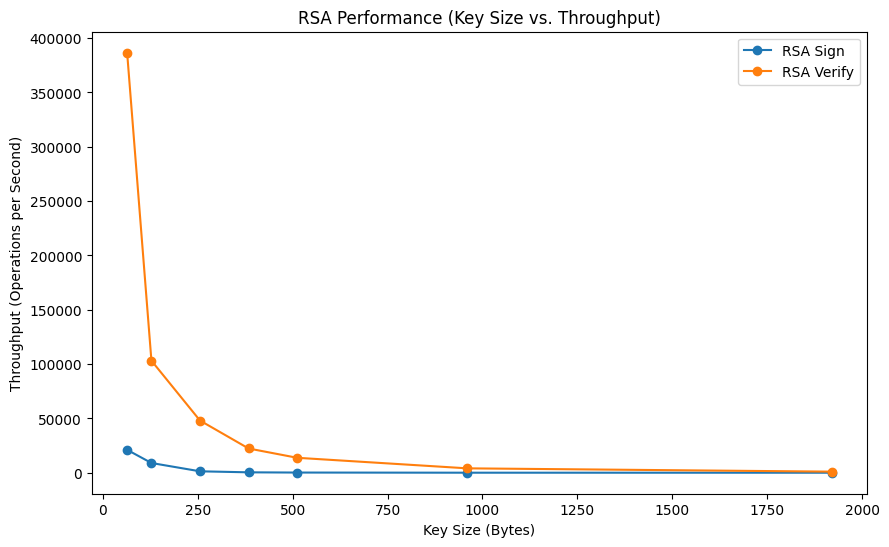

In [ ]:
def plot_rsa_results():
    keys = [512, 1024, 2048, 3072, 4096, 7680, 15360]

    key_bts = []
    for i in keys:
        key_bts.append(0.125 * i)
    print(key_bts)

    signs = [21071.9, 8948.9, 1304.1, 368.8, 162.3, 21.9, 4.3]
    verifyes = [386509.1, 103128.1, 47999.7, 22296.3, 13750.2, 4034.0, 995.8]

    plt.figure(figsize=(10, 6))

    plt.plot(key_bts, signs, label="RSA Sign", marker='o')
    plt.plot(key_bts, verifyes, label="RSA Verify", marker='o')

    plt.xlabel("Key Size (Bytes)")
    plt.ylabel("Throughput (Operations per Second)")
    plt.title("RSA Performance (Key Size vs. Throughput)")
    plt.legend()

    plt.savefig('rsa_performance.png')
    plt.show()

plot_rsa_results()


## 1. For task 1, looking at the resulting ciphertexts, what do you observe? Are you able to derive any useful information about either of the encrypted images? What are the causes for what you observe?


Based on the encrypted images, it's clear that macroscopic picture of ECB encryption does not change from the original picture, while CBC encryption does. It happens because the ECB mode encrypts each block independently, so repeated plaintext blocks will be converted to the same encrypted ciphertexts, which makes it easier to recognize patterns in encrypted data.

On the other side, the CBC mode works differently as it changes each block based on (XORed with) the previous block. As the result, for the same plaintexts, CBC populates two different ciphertexts so it makes more secure from the pattern recognitions. Moreover, the randomness is starts by the Initialization Vector (IV) xored with the first block.

## 2. For task 2, why this attack possible? What would this scheme need in order to prevent such attacks?


The bit/byte flipping attack is possible ue to the lack of integrity protection in the encryption scheme, allowing unauthorized modifications to plaintext.

Possible solutions for the scheme to prevent such man in the middle bit flipping attacks is to integrate mechanism such as digital signatures or HMAC to verify integrity of the ciphertext before decryption.


## 3. For task 3, how do the results compare? Make sure to include the plots in your report.


AES-CBC: It's clearly visible that AES-128 is faster than AES-192, which is faster than AES-256 encryptions on the same size blocks. The difference in prefomance will be more noticable for bigger block sizes.

RSA: Inversly, as we increase the key size for rsa functions, we can observe that perfomance (throughput) decreases significantly for both verification/s or signs/s, which means RSA is computationally intensive for the larger key sizes leading to weaker perfomance.  

Based on the observations, AES encryption is much faster than RSA encryption and it's better suited for larger amounts of data.


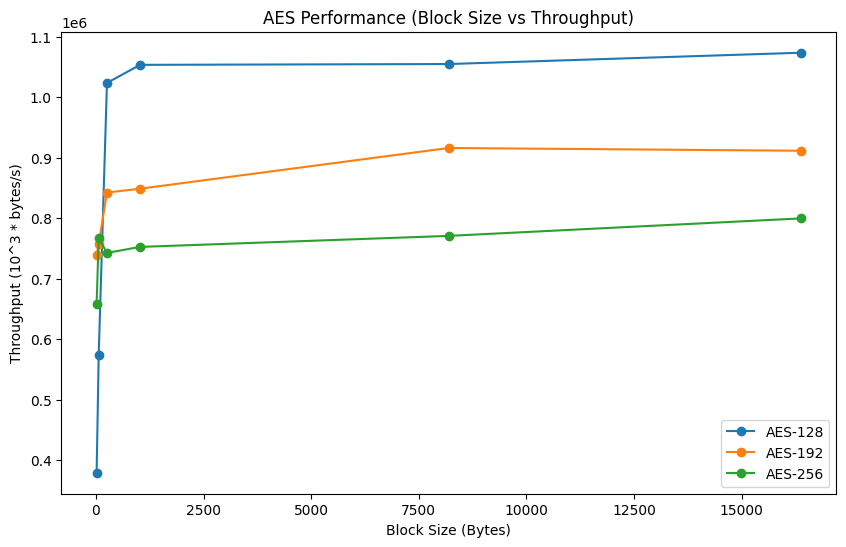

In [ ]:
plot_aes_results()


[64.0, 128.0, 256.0, 384.0, 512.0, 960.0, 1920.0]


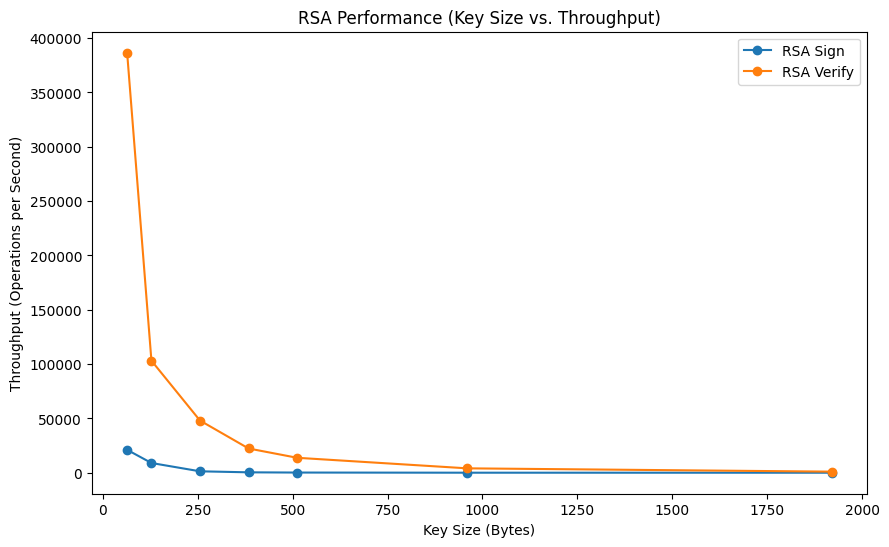

In [ ]:
plot_rsa_results()
